<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Bonheur World </h1>
</div>

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Mission 
</div>

Challenge goals

How accurately can we predict regional temperature anomalies based on past and neighbouring climate observations ?

Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique non supervisé pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité. Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).         

- Un notebook contenant les fonctions permettant le prétraitement des données ainsi que les résultats du clustering (en y incluant des représentations graphiques) ....
- Un support de présentation qui présente la démarche et les résultats du clustering.

In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm
from bonheur_bed_ara import *
from IPython.core.display import HTML

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"
country_col_name = "country"
country_official_col_name = "country_official"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Données pays
</div>

In [3]:
pays_file_name = "data_set_countries_clean.csv"

df_pays_origin = pd.read_csv(data_set_path+pays_file_name, sep=',')
df_pays_origin = df_pays_origin.sort_values(by=country_col_name)
df_pays_origin["id"] = df_pays_origin["id"].fillna(-1)
df_pays_origin["id"] = df_pays_origin["id"].astype(int)
df_pays_origin = df_pays_origin.reset_index()
df_pays_origin = df_pays_origin.drop("index", axis=1)

print(f"{df_pays_origin.shape} données chargées ------> {list(df_pays_origin.columns)}")
df_pays_origin.head()

(213, 8) données chargées ------> ['id', 'alpha3', 'alpha2', 'country', 'country_official', 'continent_code', 'latitude', 'longitude']


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
0,4,AFG,AF,Afghanistan,Islamic Republic of Afghanistan,AS,29.276770,42.274721
1,8,ALB,AL,Albania,Republic of Albania,EU,21.483333,36.066667
2,12,DZA,DZ,Algeria,People's Democratic Republic of Algeria,AF,14.349729,43.892024
3,24,AGO,AO,Angola,Republic of Angola,AF,41.795972,12.235112
4,10,ATA,AQ,Antarctica,Antarctica,NaN,-22.016981,-47.920533


In [4]:
df_pays_origin.dtypes

id                    int32
alpha3               object
alpha2               object
country              object
country_official     object
continent_code       object
latitude            float64
longitude           float64
dtype: object

In [5]:
df_pays_origin.describe(include="all")

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
count,213.000000,213,212,213,213,182,194.000000,194.000000
unique,NaN,213,212,213,213,5,NaN,NaN
top,NaN,AFG,AF,Afghanistan,Islamic Republic of Afghanistan,AF,NaN,NaN
freq,NaN,1,1,1,1,56,NaN,NaN
mean,338.938967,NaN,NaN,NaN,NaN,NaN,25.128428,19.543371
std,281.280111,NaN,NaN,NaN,NaN,NaN,24.780335,60.798641
min,-1.000000,NaN,NaN,NaN,NaN,NaN,-41.333167,-149.400973
25%,56.000000,NaN,NaN,NaN,NaN,NaN,13.297541,-1.755094
50%,320.000000,NaN,NaN,NaN,NaN,NaN,32.815291,18.894266
75%,578.000000,NaN,NaN,NaN,NaN,NaN,45.811730,45.827753


In [6]:
df_pays_origin[df_pays_origin["alpha2"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


In [7]:
# correction des doublons
df_pays_origin.loc[df_pays_origin["alpha3"]=="NAM", "alpha2"] = "NA"
df_pays_origin = df_pays_origin.drop_duplicates(subset=["alpha2"], keep="first")
print(df_pays_origin[df_pays_origin["alpha2"].duplicated()].shape)
df_pays_origin[(df_pays_origin["alpha2"]=="SO") | (df_pays_origin["alpha2"]=="CY")| (df_pays_origin["alpha3"]=="NAM")]

(0, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
41,196,CYP,CY,Cyprus,Republic of Cyprus,AS,34.683875,32.605168
125,516,NAM,NA,Namibia,Republic of Namibia,AF,34.530234,69.230180
171,706,SOM,SO,Somalia,Federal Republic of Somalia,AF,11.795646,41.012891


In [8]:
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


In [9]:
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"]=="-99"]

(0, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


In [10]:
df_pays_origin.loc[df_pays_origin["alpha3"]=="-99", "alpha3"] = np.nan
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

(0, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


<div style="display: flex; background-color: indigo;" >

#### 2.1.3 Visualisation
</div>

In [11]:
df_pays_origin = df_pays_origin.rename(columns={"id":"id_country"})
df_pays_origin.columns

Index(['id_country', 'alpha3', 'alpha2', 'country', 'country_official',
       'continent_code', 'latitude', 'longitude'],
      dtype='object')

In [12]:
print(df_pays_origin.shape)
df_pays_origin.describe(include="all")

(213, 8)


,id_country,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
count,213.000000,213,213,213,213,182,194.000000,194.000000
unique,NaN,213,213,213,213,5,NaN,NaN
top,NaN,AFG,AF,Afghanistan,Islamic Republic of Afghanistan,AF,NaN,NaN
freq,NaN,1,1,1,1,56,NaN,NaN
mean,338.938967,NaN,NaN,NaN,NaN,NaN,25.128428,19.543371
std,281.280111,NaN,NaN,NaN,NaN,NaN,24.780335,60.798641
min,-1.000000,NaN,NaN,NaN,NaN,NaN,-41.333167,-149.400973
25%,56.000000,NaN,NaN,NaN,NaN,NaN,13.297541,-1.755094
50%,320.000000,NaN,NaN,NaN,NaN,NaN,32.815291,18.894266
75%,578.000000,NaN,NaN,NaN,NaN,NaN,45.811730,45.827753


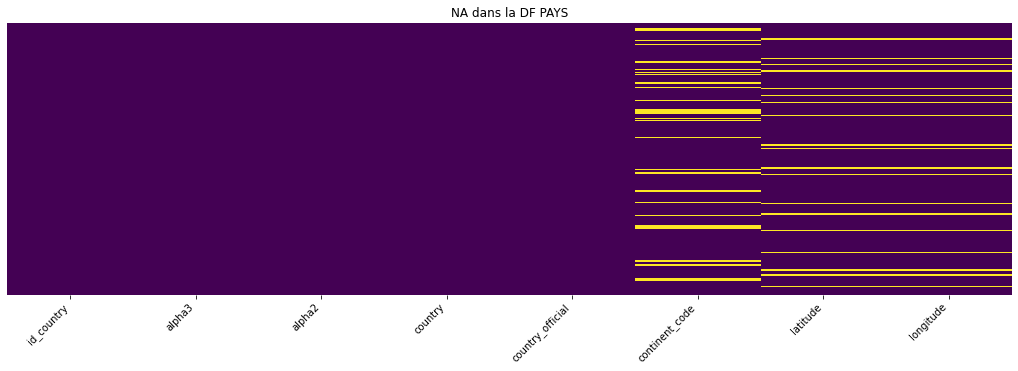

In [13]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_pays_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Evolution des scores
</div>

In [14]:
data_evolution_name = "evolution_score_altasocio_2022-04-01.csv"
df_evolution_orgin = pd.read_csv(data_set_path+data_evolution_name, sep=',')
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":country_col_name})
df_evolution_orgin = df_evolution_orgin.sort_values(by=country_col_name)

# correction des types
df_evolution_orgin = df_correct_type_to_float(df_evolution_orgin, exclude_cols=[country_col_name])

print(f"{df_evolution_orgin.shape} données chargées ------> {list(df_evolution_orgin.columns)}")
df_evolution_orgin.head()

(165, 8) données chargées ------> ['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019', 'score_2020', 'country_official']


,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


<div style="display: flex; background-color: indigo;" >

#### 2.1.2 Visualisation
</div>

In [15]:
df_evolution_orgin.head()

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


In [16]:
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":"country"})
df_evolution_orgin.columns

Index(['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       'score_2019', 'score_2020', 'country_official'],
      dtype='object')

In [17]:
df_evolution_orgin.describe(include="all")

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
count,165,158.000000,157.000000,155.000000,156.000000,156.000000,153.000000,165
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,162
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,Federal Republic of Somalia
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,5.375778,5.382185,5.367619,5.375917,5.407032,5.473255,NaN
std,NaN,1.144889,1.141674,1.142394,1.119506,1.113085,1.112288,NaN
min,NaN,2.839000,2.905000,2.693000,2.905000,2.853000,2.567000,NaN
25%,NaN,4.526000,4.404000,4.505500,4.453750,4.544500,4.724000,NaN
50%,NaN,5.232500,5.314000,5.293000,5.378000,5.379500,5.515000,NaN
75%,NaN,6.243750,6.269000,6.136500,6.168500,6.184500,6.228000,NaN


In [18]:
df_evolution_orgin.dtypes

country              object
score_2015          float64
score_2016          float64
score_2017          float64
score_2018          float64
score_2019          float64
score_2020          float64
country_official     object
dtype: object

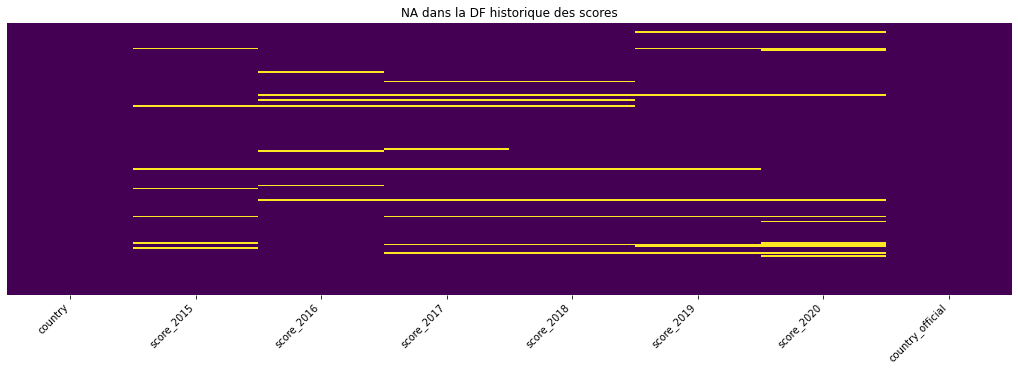

In [19]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_evolution_orgin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF historique des scores")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Détails des scores
</div>

In [20]:
score_dataset_filenames = []
score_rapport_with ="Rapport-bonheur-"

world_datas_files = []
world_start_with ="world_"

# récupération données
extensions = [".csv"]

for ext in extensions:
    score_dataset_filenames.extend(get_dir_files(data_set_path, start_with=score_rapport_with , endwith=ext))
    world_datas_files.extend(get_dir_files(data_set_path, start_with=world_start_with , endwith=ext))

print(f"{len(score_dataset_filenames)} Fichiers score à traiter et {len(world_datas_files)} Fichiers monde à traiter")

4 Fichiers score à traiter et 20 Fichiers monde à traiter


In [21]:
# verbose = 1
df_origine_light, df_origine_by_line, df_origine = load_scores_files(score_dataset_filenames, data_set_path, country_col_name = country_col_name,country_official_name = country_official_col_name, score_rapport_with=score_rapport_with, verbose=verbose)
df_origine_light.head()

100%|██████████| 4/4 [02:33<00:00, 38.25s/it] 


,country_official,Regional indicator,2019-country_origin,2020-country_origin,2021-country_origin,2022-country_origin,2019-country,2019-rank,2022,2021,...,2022-rank,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
134,Arab Republic of Egypt,Middle East and North Africa,Egypt,Egypt,Egypt,Egypt,Egypt,137.0,4.288,4.283,...,129.0,4.377,4.198,0.856,1.388,0.732,0.548,0.469,0.041,0.254
46,Argentine Republic,Latin America and Caribbean,Argentina,Argentina,Argentina,Argentina,Argentina,47.0,5.967,5.929,...,57.0,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
10,Australia,North America and ANZ,Australia,Australia,Australia,Australia,Australia,11.0,7.162,7.183,...,12.0,7.244,7.081,2.011,1.900,1.203,0.772,0.676,0.258,0.341
60,Bolivia,Latin America and Caribbean,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,61.0,5.600,5.716,...,71.0,5.709,5.491,2.107,1.256,0.880,0.555,0.627,0.112,0.064
113,Burkina Faso,Sub-Saharan Africa,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,Burkina Faso,115.0,4.670,4.834,...,113.0,4.814,4.527,2.313,0.779,0.565,0.320,0.382,0.186,0.126


In [22]:
df_origine_light.columns

Index(['country_official', 'Regional indicator', '2019-country_origin',
       '2020-country_origin', '2021-country_origin', '2022-country_origin',
       '2019-country', '2019-rank', '2022', '2021', '2020', '2019', '2019-PIB',
       '2019-Soutien', '2019-Esperance vie BS',
       '2019-Liberte des choix de vie', '2019-Generosite', '2019-Corruption',
       '2020-country', '2020-Whisker-high', '2020-Whisker-low', '2020-PIB',
       '2020-Soutien', '2020-Esperance vie BS',
       '2020-Liberte des choix de vie', '2020-Generosite', '2020-Corruption',
       '2020-Dystopia + residual', '2021-country', '2021-Whisker-high',
       '2021-Whisker-low', '2021-PIB', '2021-Soutien', '2021-Esperance vie BS',
       '2021-Liberte des choix de vie', '2021-Generosite', '2021-Corruption',
       '2021-Dystopia + residual', '2022-country', '2022-rank',
       '2022-Whisker-high', '2022-Whisker-low', '2022-Dystopia + residual',
       '2022-PIB', '2022-Soutien', '2022-Esperance vie BS',
       '2022-L

In [23]:
df_origine_light["country_official"].value_counts()

Arab Republic of Egypt         1
Republic of North Macedonia    1
Republic of Mali               1
Republic of Malta              1
Republic of Mauritius          1
                              ..
Malaysia                       1
Moldova                        1
Mongolia                       1
Montenegro                     1
Vietnam                        1
Name: country_official, Length: 157, dtype: int64

Les doublons ont été traités dans lors du chargement des données (`Republic of Cyprus` et `Kingdom of Sweden`)

- Une analyse des différences entre les noms de pays des différentes années a été faite pour uniformiser les données. (cf. annexe)
- Puis une fusion et suppression des colonnes inutiles des pays par années (avant de supprimer une vérification a été faite pour identifier les écarts (cf. annexe)

In [24]:
start = 2019
end = 2022

In [25]:
df_origine_light_year_merged = merge_and_clean_country_by_year(df=df_origine_light, start=start, end=end, verbose=verbose)
print(f"BEFORE : {df_origine_light.shape} / AFTER : {df_origine_light_year_merged.shape}")
df_origine_light_year_merged.head()

country_origin na:3 and country na:3
country_origin na:1 and country na:1
country_origin na:1 and country na:1
country_origin na:0 and country na:0


100%|██████████| 4/4 [00:00<?, ?it/s]

BEFORE : (157, 49) / AFTER : (157, 42)


,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
134,Arab Republic of Egypt,Egypt,Middle East and North Africa,4.166,4.151,4.283,4.288,137.0,1.039,129.0,...,0.795,1.648,4.377,4.198,0.856,0.732,0.548,0.469,0.041,0.254
46,Argentine Republic,Argentina,Latin America and Caribbean,6.086,5.975,5.929,5.967,47.0,1.432,57.0,...,0.834,2.461,6.090,5.844,1.891,1.102,0.662,0.555,0.081,0.085
10,Australia,Australia,North America and ANZ,7.228,7.223,7.183,7.162,11.0,1.548,12.0,...,0.442,2.598,7.244,7.081,2.011,1.203,0.772,0.676,0.258,0.341
60,Bolivia,Bolivia,Latin America and Caribbean,5.779,5.747,5.716,5.600,61.0,1.209,71.0,...,0.839,2.805,5.709,5.491,2.107,0.880,0.555,0.627,0.112,0.064
113,Burkina Faso,Burkina Faso,Sub-Saharan Africa,4.587,4.769,4.834,4.670,115.0,1.056,113.0,...,0.748,3.133,4.814,4.527,2.313,0.565,0.320,0.382,0.186,0.126


In [26]:
df_origine_light_year_merged.describe(include="all")

,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
count,157,157,151,154.000000,151.000000,147.000000,145.000000,154.000000,154.000000,145.000000,...,147.000000,147.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
unique,157,157,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab Republic of Egypt,Egypt,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.412838,5.460391,5.520367,5.554172,78.227273,1.208922,73.462069,...,0.731476,2.433898,5.674034,5.434317,1.837007,0.905986,0.584566,0.517186,0.147497,0.154379
std,NaN,NaN,NaN,1.115900,1.109022,1.070520,1.090586,45.225726,0.301081,42.434757,...,0.175578,0.537060,1.069301,1.113188,0.533135,0.281089,0.175873,0.146364,0.083073,0.127864
min,NaN,NaN,NaN,2.853000,2.567000,2.523000,2.404000,1.000000,0.000000,1.000000,...,0.082000,0.648000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,4.550750,4.700500,4.843000,4.888000,39.250000,1.055250,37.000000,...,0.677500,2.143000,4.999000,4.753000,1.556000,0.732000,0.462000,0.440000,0.089000,0.068000
50%,NaN,NaN,NaN,5.379500,5.510000,5.477000,5.578000,78.500000,1.275500,73.000000,...,0.787000,2.509000,5.681000,5.467000,1.895000,0.958000,0.620000,0.545000,0.134000,0.116000
75%,NaN,NaN,NaN,6.189500,6.227500,6.239000,6.309000,116.750000,1.453500,110.000000,...,0.846000,2.794000,6.460000,6.202000,2.153000,1.116000,0.719000,0.627000,0.198000,0.194000


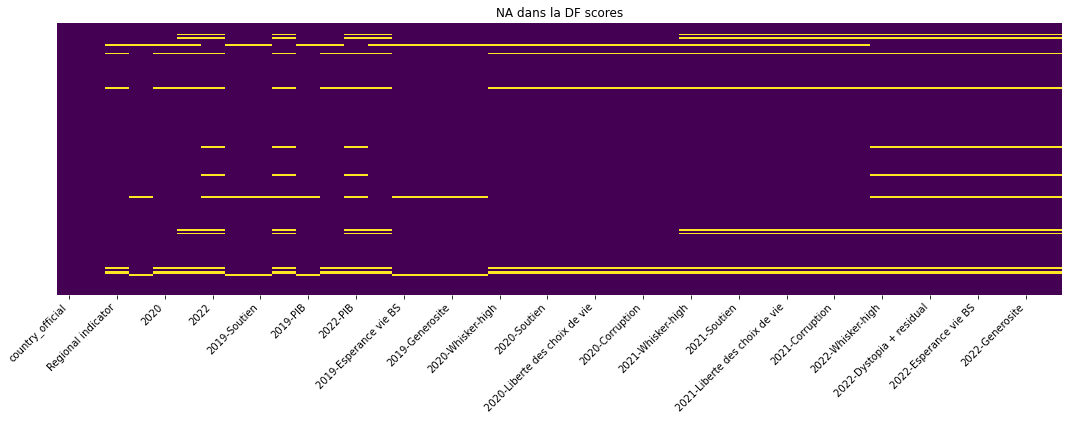

In [27]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_origine_light_year_merged.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [28]:
df_origine_by_line["year"] = df_origine_by_line["year"].astype(int)
df_origine_by_line.head()

,country_official,country,rank,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,country_origin,year,Regional indicator,Whisker-high,Whisker-low,Dystopia + residual
137,Arab Republic of Egypt,Egypt,NaN,4.151,9.317,0.735,61.780,0.708,-0.197,0.788,Egypt,2020,Middle East and North Africa,4.222,4.081,1.159
128,Arab Republic of Egypt,Egypt,129.0,4.288,1.388,0.732,0.548,0.469,0.041,0.254,Egypt,2022,NaN,4.377,4.198,0.856
131,Arab Republic of Egypt,Egypt,NaN,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,Egypt,2021,Middle East and North Africa,4.371,4.195,1.648
136,Arab Republic of Egypt,Egypt,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt,2019,NaN,NaN,NaN,NaN
46,Argentine Republic,Argentina,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,2019,NaN,NaN,NaN,NaN


In [29]:
df_origine_by_line.dtypes

country_official             object
country                      object
rank                        float64
score                       float64
PIB                         float64
Soutien                     float64
Esperance vie BS            float64
Liberte des choix de vie    float64
Generosite                  float64
Corruption                  float64
country_origin               object
year                          int32
Regional indicator           object
Whisker-high                float64
Whisker-low                 float64
Dystopia + residual         float64
dtype: object

In [30]:
df_origine_by_line.describe(include="all")

,country_official,country,rank,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,country_origin,year,Regional indicator,Whisker-high,Whisker-low,Dystopia + residual
count,597,597,299.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,597,597.000000,298,443.000000,443.000000,443.000000
unique,157,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,NaN,10,NaN,NaN,NaN
top,Arab Republic of Egypt,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt,NaN,Sub-Saharan Africa,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,75,NaN,NaN,NaN
mean,NaN,NaN,75.916388,5.510989,6.747524,0.841968,43.647752,0.698255,0.037691,0.544479,NaN,2020.474037,NaN,5.624427,5.397542,2.082235
std,NaN,NaN,43.885869,1.088554,3.859714,0.192811,30.597451,0.178722,0.153607,0.315786,NaN,1.119419,NaN,1.070241,1.108101,0.600419
min,NaN,NaN,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,-0.301000,0.000000,NaN,2019.000000,NaN,2.469000,2.339000,0.187000
25%,NaN,NaN,38.000000,4.770500,1.806000,0.736000,0.730500,0.588000,-0.083500,0.184000,NaN,2019.000000,NaN,4.887000,4.645500,1.726500
50%,NaN,NaN,76.000000,5.534000,8.485000,0.855000,59.305000,0.719000,0.050000,0.684000,NaN,2020.000000,NaN,5.619000,5.423000,2.131000
75%,NaN,NaN,113.500000,6.260000,9.820000,0.935500,67.450500,0.843000,0.134000,0.821000,NaN,2021.000000,NaN,6.386000,6.145000,2.484500


In [31]:
df_origine_by_line.columns

Index(['country_official', 'country', 'rank', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption', 'country_origin', 'year', 'Regional indicator',
       'Whisker-high', 'Whisker-low', 'Dystopia + residual'],
      dtype='object')

In [32]:
df_origine_by_line = df_origine_by_line[['country_official', 'Regional indicator','country', 'country_origin','year', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption',  
       'Whisker-high', 'Whisker-low', 'Dystopia + residual','rank']]

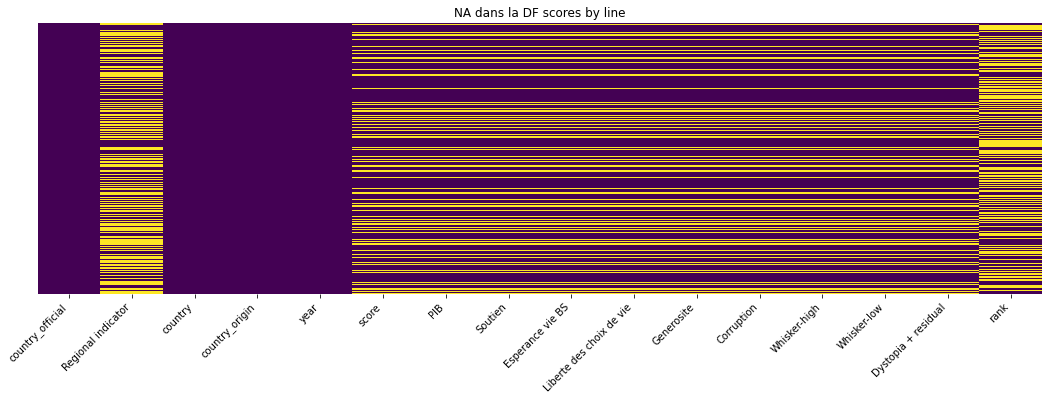

In [33]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_origine_by_line.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: indigo;" >

#### 2.3.x. Complément des données
</div>

In [34]:
df_light_completed = df_origine_light_year_merged.copy()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Fusion Détails des scores et évolution des scores
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Fusion dataset source et données temporelles
</div>

<div style="display: flex; background-color: deeppink;" >

##### 2.2.1.x DF by line
</div>

In [35]:
df_evolution_orgin.columns

Index(['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       'score_2019', 'score_2020', 'country_official'],
      dtype='object')

In [36]:
verbose = 1
df_light_completed_by_line = score_by_line_complete_with_historic_score(df_evolution_orgin, df_origine_by_line, verbose=verbose)
# On complète la région
df_light_completed_by_line = fill_na_regional_indicator(df_light_completed_by_line, verbose=verbose)
print(df_light_completed_by_line.shape)
df_light_completed_by_line.head()

INPUT (597, 16)  dont score NA : 154
OUTPUT (1378, 16)  dont score NA : 0
INPUT Regional indicator NA :  1080 => OUTPUT :  46
(1378, 16)


,country_official,Regional indicator,country,country_origin,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Whisker-high,Whisker-low,Dystopia + residual,rank
0,Arab Republic of Egypt,Middle East and North Africa,Egypt,Egypt,2020,4.151,9.317,0.735,61.780,0.708,-0.197,0.788,4.222,4.081,1.159,NaN
1,Arab Republic of Egypt,Middle East and North Africa,Egypt,Egypt,2022,4.288,1.388,0.732,0.548,0.469,0.041,0.254,4.377,4.198,0.856,129.0
2,Arab Republic of Egypt,Middle East and North Africa,Egypt,Egypt,2021,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,4.371,4.195,1.648,NaN
3,Argentine Republic,Latin America and Caribbean,Argentina,Argentina,2022,5.967,1.592,1.102,0.662,0.555,0.081,0.085,6.090,5.844,1.891,57.0
4,Argentine Republic,Latin America and Caribbean,Argentina,Argentina,2021,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,6.040,5.819,2.461,NaN


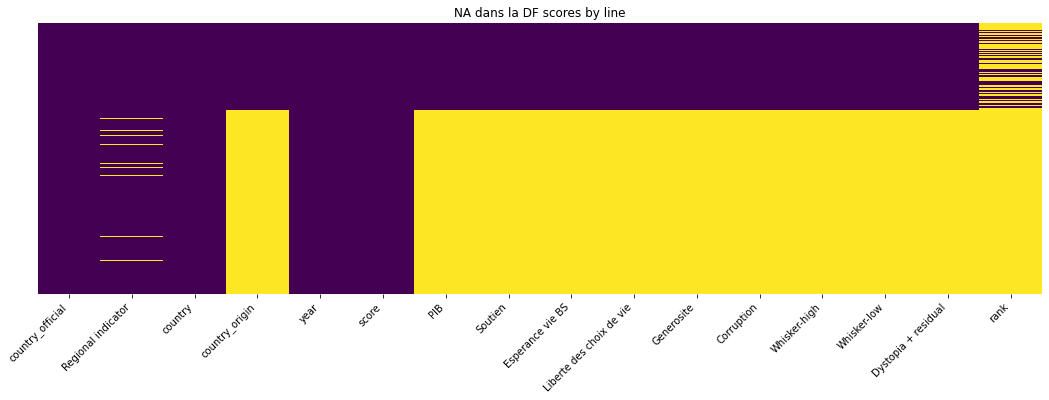

In [37]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_light_completed_by_line.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: deeppink;" >

##### 2.2.1.x DF by columns
</div>

In [38]:
df_light_merged = score_by_columns_complete_with_historic_score(df_light_completed,df_evolution_orgin, country_official_col_name, verbose = verbose)
df_light_merged.head()

INPUT : (157, 42), (165, 8) MERGE = (166, 50)
OUTPUT (163, 50)


,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2022-Generosite,2022-Corruption,country_FR,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,_merge
0,Arab Republic of Egypt,Egypt,Middle East and North Africa,4.166,4.151,4.283,4.288,137.0,1.039,129.0,...,0.041,0.254,Égypte,4.194,4.362,4.735,4.419,4.166,4.151,both
98,Republic of Kazakhstan,Kazakhstan,Commonwealth of Independent States,5.809,6.058,6.152,6.234,60.0,1.508,40.0,...,0.134,0.157,Kazakhstan,5.855,5.919,5.819,5.790,5.809,6.058,both
99,Republic of Kenya,Kenya,Sub-Saharan Africa,4.509,4.583,4.607,4.543,121.0,0.983,119.0,...,0.322,0.082,Kenya,4.419,4.356,4.553,4.410,4.509,4.583,both
100,Republic of Latvia,Latvia,Central and Eastern Europe,5.940,5.950,6.032,6.180,53.0,1.465,42.0,...,0.075,0.090,Lettonie,5.098,5.560,5.850,5.933,5.940,5.950,both
101,Republic of Liberia,Liberia,Sub-Saharan Africa,3.975,4.558,4.625,5.122,141.0,0.922,97.0,...,0.178,0.080,Liberia,4.571,3.622,3.533,3.495,3.975,4.558,both


In [39]:
df_light_merged.describe(include="all")

,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2022-Generosite,2022-Corruption,country_FR,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,_merge
count,163,157,151,154.000000,151.000000,147.000000,145.000000,154.000000,154.000000,145.000000,...,145.000000,145.000000,162,156.000000,154.000000,154.000000,155.000000,155.000000,152.000000,163
unique,163,157,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Arab Republic of Egypt,Egypt,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Égypte,NaN,NaN,NaN,NaN,NaN,NaN,both
freq,1,1,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,156
mean,NaN,NaN,NaN,5.412838,5.460391,5.520367,5.554172,78.227273,1.208922,73.462069,...,0.147497,0.154379,NaN,5.375673,5.371013,5.364747,5.372955,5.405026,5.472842,NaN
std,NaN,NaN,NaN,1.115900,1.109022,1.070520,1.090586,45.225726,0.301081,42.434757,...,0.083073,0.127864,NaN,1.151710,1.144216,1.145560,1.122521,1.116410,1.115953,NaN
min,NaN,NaN,NaN,2.853000,2.567000,2.523000,2.404000,1.000000,0.000000,1.000000,...,0.000000,0.000000,NaN,2.839000,2.905000,2.693000,2.905000,2.853000,2.567000,NaN
25%,NaN,NaN,NaN,4.550750,4.700500,4.843000,4.888000,39.250000,1.055250,37.000000,...,0.089000,0.068000,NaN,4.517750,4.397250,4.501250,4.451500,4.541000,4.712250,NaN
50%,NaN,NaN,NaN,5.379500,5.510000,5.477000,5.578000,78.500000,1.275500,73.000000,...,0.134000,0.116000,NaN,5.232500,5.308500,5.286000,5.358000,5.373000,5.512500,NaN
75%,NaN,NaN,NaN,6.189500,6.227500,6.239000,6.309000,116.750000,1.453500,110.000000,...,0.198000,0.194000,NaN,6.275500,6.261500,6.152250,6.170000,6.187000,6.235500,NaN


In [40]:
df_light_merged[df_light_merged["country_origin"].isna()]

,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2022-Generosite,2022-Corruption,country_FR,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,_merge
139,Republic of the Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Soudan,4.550,4.139,4.139,4.139,NaN,NaN,right_only
65,Republic of Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Angola,4.033,3.866,3.795,3.795,NaN,NaN,right_only
3,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Belize,NaN,5.956,5.956,5.956,NaN,NaN,right_only
125,Republic of Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Suriname,6.269,6.269,NaN,NaN,NaN,NaN,right_only
149,Sultanate of Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Oman,6.853,NaN,NaN,NaN,NaN,NaN,right_only
84,Republic of Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Djibouti,4.369,NaN,NaN,NaN,NaN,NaN,right_only


In [41]:
df_light_merged_clean = score_by_columns_fill_na_datas(df_light_merged, verbose=verbose)

2019 : 9 NA => AFTER : 8 NA
2020 : 8 NA => AFTER : 8 NA
country_origin : 6 NA => AFTER country_origin : 0 NA
right_only : (163, 50) => AFTER (157, 50)


In [42]:
df_light_merged_clean["_merge"].value_counts()

both          156
left_only       1
right_only      0
Name: _merge, dtype: int64

In [43]:
df_light_merged_clean

,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,...,2022-Generosite,2022-Corruption,country_FR,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,_merge
0,Arab Republic of Egypt,Egypt,Middle East and North Africa,4.166,4.151,4.283,4.288,137.0,1.039,129.0,...,0.041,0.254,Égypte,4.194,4.362,4.735,4.419,4.166,4.151,both
98,Republic of Kazakhstan,Kazakhstan,Commonwealth of Independent States,5.809,6.058,6.152,6.234,60.0,1.508,40.0,...,0.134,0.157,Kazakhstan,5.855,5.919,5.819,5.790,5.809,6.058,both
99,Republic of Kenya,Kenya,Sub-Saharan Africa,4.509,4.583,4.607,4.543,121.0,0.983,119.0,...,0.322,0.082,Kenya,4.419,4.356,4.553,4.410,4.509,4.583,both
100,Republic of Latvia,Latvia,Central and Eastern Europe,5.940,5.950,6.032,6.180,53.0,1.465,42.0,...,0.075,0.090,Lettonie,5.098,5.560,5.850,5.933,5.940,5.950,both
101,Republic of Liberia,Liberia,Sub-Saharan Africa,3.975,4.558,4.625,5.122,141.0,0.922,97.0,...,0.178,0.080,Liberia,4.571,3.622,3.533,3.495,3.975,4.558,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,"Eswatini, Kingdom of","Eswatini, Kingdom of",NaN,4.212,4.308,NaN,4.396,NaN,NaN,125.0,...,0.038,0.154,Eswatini,4.867,NaN,NaN,NaN,4.212,4.308,both
39,Kingdom of Bhutan,Bhutan,NaN,5.082,NaN,NaN,NaN,95.0,1.321,NaN,...,NaN,NaN,Bhoutan,5.253,5.196,5.011,5.082,5.082,NaN,both
148,State of Qatar,Qatar,NaN,6.374,NaN,NaN,NaN,29.0,1.313,NaN,...,NaN,NaN,Qatar,6.611,6.375,6.375,6.374,6.374,NaN,both
151,Syria,Syria,NaN,3.462,NaN,NaN,NaN,149.0,0.378,NaN,...,NaN,NaN,Syrie,3.006,3.069,3.462,3.462,3.462,NaN,both


In [44]:
display(HTML(df_light_merged_clean[df_light_merged_clean["_merge"] != "both"].to_html()))

,country_official,country_origin,Regional indicator,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,country_FR,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,_merge
153,Taiwan Province of China,Taiwan Province of China,East Asia,NaN,6.455,6.584,6.512,NaN,NaN,26.0,NaN,10.776,1.897,10.871,NaN,NaN,NaN,NaN,6.532,6.379,0.894,69.6,0.772,-0.073,0.732,2.16,6.659,6.51,0.898,69.6,0.784,-0.07,0.721,2.687,6.596,6.429,2.002,1.095,0.733,0.542,0.075,0.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [45]:
df_light_merged_clean = score_by_columns_organise_columns(df_light_merged_clean, verbose=verbose)
display(HTML(df_light_merged_clean.head().to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,score_2019,2020,score_2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
0,Arab Republic of Egypt,Egypt,Middle East and North Africa,Égypte,4.194,4.362,4.735,4.419,4.166,4.166,4.151,4.151,4.283,4.288,137.0,1.039,129.0,0.913,9.317,1.388,9.367,0.644,0.241,0.076,0.067,4.222,4.081,0.735,61.780,0.708,-0.197,0.788,1.159,4.371,4.195,0.750,61.998,0.749,-0.182,0.795,1.648,4.377,4.198,0.856,0.732,0.548,0.469,0.041,0.254
98,Republic of Kazakhstan,Kazakhstan,Commonwealth of Independent States,Kazakhstan,5.855,5.919,5.819,5.790,5.809,5.809,6.058,6.058,6.152,6.234,60.0,1.508,40.0,1.173,10.115,1.668,10.155,0.729,0.410,0.146,0.096,6.143,5.973,0.935,64.610,0.812,-0.068,0.764,2.022,6.243,6.060,0.952,65.200,0.853,-0.069,0.733,2.446,6.330,6.138,1.860,1.220,0.611,0.584,0.134,0.157
99,Republic of Kenya,Kenya,Sub-Saharan Africa,Kenya,4.419,4.356,4.553,4.410,4.509,4.509,4.583,4.583,4.607,4.543,121.0,0.983,119.0,0.512,8.030,1.032,8.361,0.581,0.431,0.372,0.053,4.716,4.450,0.703,60.097,0.830,0.295,0.831,1.685,4.747,4.466,0.688,60.704,0.779,0.287,0.825,2.180,4.683,4.403,1.661,0.605,0.401,0.440,0.322,0.082
100,Republic of Latvia,Latvia,Central and Eastern Europe,Lettonie,5.098,5.560,5.850,5.933,5.940,5.940,5.950,5.950,6.032,6.180,53.0,1.465,42.0,1.187,10.175,1.732,10.315,0.812,0.264,0.075,0.064,6.018,5.882,0.918,66.807,0.671,-0.187,0.796,2.121,6.103,5.961,0.927,67.100,0.715,-0.162,0.800,2.536,6.255,6.106,1.923,1.221,0.637,0.502,0.075,0.090
101,Republic of Liberia,Liberia,Sub-Saharan Africa,Liberia,4.571,3.622,3.533,3.495,3.975,3.975,4.558,4.558,4.625,5.122,141.0,0.922,97.0,0.073,7.054,0.636,7.288,0.443,0.370,0.233,0.033,4.719,4.397,0.709,56.096,0.735,0.042,0.856,2.387,4.833,4.417,0.720,56.498,0.735,0.050,0.850,2.857,5.428,4.815,2.844,0.670,0.309,0.405,0.178,0.080


In [46]:
display(HTML(df_light_merged_clean[(df_light_merged_clean["2019"]!=df_light_merged_clean["score_2019"])].to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,score_2019,2020,score_2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
146,State of Kuwait,Kuwait,Middle East and North Africa,Koweït,6.295,6.239,6.105,6.083,6.021,6.011,6.102,6.102,6.106,6.106,51.0,1.319,50.0,1.5,11.090,1.904,10.817,0.808,0.493,0.142,0.097,6.207,5.998,0.846,66.768,0.872,-0.100,0.761,1.840,6.235,5.977,0.843,66.9,0.867,-0.104,0.736,2.368,6.235,5.977,1.621,0.983,0.747,0.617,0.087,0.147
153,Taiwan Province of China,Taiwan Province of China,East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.455,NaN,6.584,6.512,NaN,NaN,26.0,NaN,10.776,1.897,10.871,NaN,NaN,NaN,NaN,6.532,6.379,0.894,69.600,0.772,-0.073,0.732,2.160,6.659,6.510,0.898,69.6,0.784,-0.070,0.721,2.687,6.596,6.429,2.002,1.095,0.733,0.542,0.075,0.168
105,Republic of Maldives,Maldives,South Asia,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,5.198,5.198,5.198,NaN,NaN,NaN,NaN,NaN,9.519,NaN,9.826,NaN,NaN,NaN,NaN,5.339,5.057,0.913,70.600,0.854,0.038,0.824,1.099,5.339,5.057,0.913,70.6,0.854,0.024,0.825,1.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(HTML(df_light_merged_clean[(df_light_merged_clean["2019"]!=df_light_merged_clean["score_2019"])].to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,score_2019,2020,score_2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,_merge
81,Republic of Cyprus,Northern Cyprus,Western Europe,Chypre,5.689,5.546,5.621,5.762,5.718,6.046,6.159,6.159,6.223,5.467,64.0,1.252,79.0,1.263,10.406,1.815,10.576,1.042,0.417,0.191,0.162,6.258,6.060,0.806,73.702,0.780,0.044,0.856,2.032,6.319,6.128,0.802,73.898,0.763,-0.015,0.844,2.578,5.609,5.325,1.078,0.888,0.819,0.523,0.130,0.213,both
146,State of Kuwait,Kuwait,Middle East and North Africa,Koweït,6.295,6.239,6.105,6.083,6.021,6.011,6.102,6.102,6.106,6.106,51.0,1.319,50.0,1.500,11.090,1.904,10.817,0.808,0.493,0.142,0.097,6.207,5.998,0.846,66.768,0.872,-0.100,0.761,1.840,6.235,5.977,0.843,66.900,0.867,-0.104,0.736,2.368,6.235,5.977,1.621,0.983,0.747,0.617,0.087,0.147,both
153,Taiwan Province of China,Taiwan Province of China,East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.455,NaN,6.584,6.512,NaN,NaN,26.0,NaN,10.776,1.897,10.871,NaN,NaN,NaN,NaN,6.532,6.379,0.894,69.600,0.772,-0.073,0.732,2.160,6.659,6.510,0.898,69.600,0.784,-0.070,0.721,2.687,6.596,6.429,2.002,1.095,0.733,0.542,0.075,0.168,left_only
105,Republic of Maldives,Maldives,South Asia,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,5.198,5.198,5.198,NaN,NaN,NaN,NaN,NaN,9.519,NaN,9.826,NaN,NaN,NaN,NaN,5.339,5.057,0.913,70.600,0.854,0.038,0.824,1.099,5.339,5.057,0.913,70.600,0.854,0.024,0.825,1.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


In [47]:
display(HTML(df_light_merged_clean[(df_light_merged_clean["2020"]!=df_light_merged_clean["score_2020"])].to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,score_2019,2020,score_2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
47,Kingdom of Sweden,Sweden,Sub-Saharan Africa,Suède,7.364,7.291,7.284,7.314,7.343,7.343,4.308,7.353,4.308,7.384,7.0,1.487,7.0,1.387,9.163,1.920,9.065,1.009,0.574,0.267,0.373,4.448,4.168,0.770,51.188,0.647,-0.199,0.708,1.686,4.448,4.168,0.770,50.833,0.647,-0.185,0.708,2.155,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512
153,Taiwan Province of China,Taiwan Province of China,East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.455,NaN,6.584,6.512,NaN,NaN,26.0,NaN,10.776,1.897,10.871,NaN,NaN,NaN,NaN,6.532,6.379,0.894,69.600,0.772,-0.073,0.732,2.160,6.659,6.510,0.898,69.600,0.784,-0.070,0.721,2.687,6.596,6.429,2.002,1.095,0.733,0.542,0.075,0.168
39,Kingdom of Bhutan,Bhutan,NaN,Bhoutan,5.253,5.196,5.011,5.082,5.082,5.082,NaN,NaN,NaN,NaN,95.0,1.321,NaN,0.813,NaN,NaN,NaN,0.604,0.457,0.370,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,State of Qatar,Qatar,NaN,Qatar,6.611,6.375,6.375,6.374,6.374,6.374,NaN,NaN,NaN,NaN,29.0,1.313,NaN,1.684,NaN,NaN,NaN,0.871,0.555,0.220,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Syria,Syria,NaN,Syrie,3.006,3.069,3.462,3.462,3.462,3.462,NaN,NaN,NaN,NaN,149.0,0.378,NaN,0.619,NaN,NaN,NaN,0.440,0.013,0.331,0.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Federal Republic of Somalia,Somalia,NaN,Somalie,NaN,5.440,5.151,4.982,4.668,4.668,NaN,NaN,NaN,NaN,112.0,0.698,NaN,0.000,NaN,NaN,NaN,0.268,0.559,0.243,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(HTML(df_light_merged_clean[(df_light_merged_clean["2020"]!=df_light_merged_clean["score_2020"])].to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,score_2019,2020,score_2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,_merge
47,Kingdom of Sweden,Sweden,Sub-Saharan Africa,Suède,7.364,7.291,7.284,7.314,7.343,7.343,4.308,7.353,4.308,7.384,7.0,1.487,7.0,1.387,9.163,1.920,9.065,1.009,0.574,0.267,0.373,4.448,4.168,0.770,51.188,0.647,-0.199,0.708,1.686,4.448,4.168,0.770,50.833,0.647,-0.185,0.708,2.155,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512,both
153,Taiwan Province of China,Taiwan Province of China,East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.455,NaN,6.584,6.512,NaN,NaN,26.0,NaN,10.776,1.897,10.871,NaN,NaN,NaN,NaN,6.532,6.379,0.894,69.600,0.772,-0.073,0.732,2.160,6.659,6.510,0.898,69.600,0.784,-0.070,0.721,2.687,6.596,6.429,2.002,1.095,0.733,0.542,0.075,0.168,left_only
39,Kingdom of Bhutan,Bhutan,NaN,Bhoutan,5.253,5.196,5.011,5.082,5.082,5.082,NaN,NaN,NaN,NaN,95.0,1.321,NaN,0.813,NaN,NaN,NaN,0.604,0.457,0.370,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
148,State of Qatar,Qatar,NaN,Qatar,6.611,6.375,6.375,6.374,6.374,6.374,NaN,NaN,NaN,NaN,29.0,1.313,NaN,1.684,NaN,NaN,NaN,0.871,0.555,0.220,0.167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
151,Syria,Syria,NaN,Syrie,3.006,3.069,3.462,3.462,3.462,3.462,NaN,NaN,NaN,NaN,149.0,0.378,NaN,0.619,NaN,NaN,NaN,0.440,0.013,0.331,0.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
18,Federal Republic of Somalia,Somalia,NaN,Somalie,NaN,5.440,5.151,4.982,4.668,4.668,NaN,NaN,NaN,NaN,112.0,0.698,NaN,0.000,NaN,NaN,NaN,0.268,0.559,0.243,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both


Après vérification des données entre les différentes sources, certaines données du fichier d'origine sont erronées, donc correction avec la seconde source de données qui est correcte.

In [49]:
df_light_merged_clean = df_light_merged_clean.drop(columns=["2019", "2020"])
df_light_merged_clean = df_light_merged_clean.rename(columns={"score_2019" : "2019", "score_2020":"2020"})
display(HTML(df_light_merged_clean.head().to_html()))

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,2020,2021,2022,2019-rank,2019-Soutien,2022-rank,2019-PIB,2020-PIB,2022-PIB,2021-PIB,2019-Esperance vie BS,2019-Liberte des choix de vie,2019-Generosite,2019-Corruption,2020-Whisker-high,2020-Whisker-low,2020-Soutien,2020-Esperance vie BS,2020-Liberte des choix de vie,2020-Generosite,2020-Corruption,2020-Dystopia + residual,2021-Whisker-high,2021-Whisker-low,2021-Soutien,2021-Esperance vie BS,2021-Liberte des choix de vie,2021-Generosite,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
0,Arab Republic of Egypt,Egypt,Middle East and North Africa,Égypte,4.194,4.362,4.735,4.419,4.166,4.151,4.283,4.288,137.0,1.039,129.0,0.913,9.317,1.388,9.367,0.644,0.241,0.076,0.067,4.222,4.081,0.735,61.780,0.708,-0.197,0.788,1.159,4.371,4.195,0.750,61.998,0.749,-0.182,0.795,1.648,4.377,4.198,0.856,0.732,0.548,0.469,0.041,0.254
98,Republic of Kazakhstan,Kazakhstan,Commonwealth of Independent States,Kazakhstan,5.855,5.919,5.819,5.790,5.809,6.058,6.152,6.234,60.0,1.508,40.0,1.173,10.115,1.668,10.155,0.729,0.410,0.146,0.096,6.143,5.973,0.935,64.610,0.812,-0.068,0.764,2.022,6.243,6.060,0.952,65.200,0.853,-0.069,0.733,2.446,6.330,6.138,1.860,1.220,0.611,0.584,0.134,0.157
99,Republic of Kenya,Kenya,Sub-Saharan Africa,Kenya,4.419,4.356,4.553,4.410,4.509,4.583,4.607,4.543,121.0,0.983,119.0,0.512,8.030,1.032,8.361,0.581,0.431,0.372,0.053,4.716,4.450,0.703,60.097,0.830,0.295,0.831,1.685,4.747,4.466,0.688,60.704,0.779,0.287,0.825,2.180,4.683,4.403,1.661,0.605,0.401,0.440,0.322,0.082
100,Republic of Latvia,Latvia,Central and Eastern Europe,Lettonie,5.098,5.560,5.850,5.933,5.940,5.950,6.032,6.180,53.0,1.465,42.0,1.187,10.175,1.732,10.315,0.812,0.264,0.075,0.064,6.018,5.882,0.918,66.807,0.671,-0.187,0.796,2.121,6.103,5.961,0.927,67.100,0.715,-0.162,0.800,2.536,6.255,6.106,1.923,1.221,0.637,0.502,0.075,0.090
101,Republic of Liberia,Liberia,Sub-Saharan Africa,Liberia,4.571,3.622,3.533,3.495,3.975,4.558,4.625,5.122,141.0,0.922,97.0,0.073,7.054,0.636,7.288,0.443,0.370,0.233,0.033,4.719,4.397,0.709,56.096,0.735,0.042,0.856,2.387,4.833,4.417,0.720,56.498,0.735,0.050,0.850,2.857,5.428,4.815,2.844,0.670,0.309,0.405,0.178,0.080


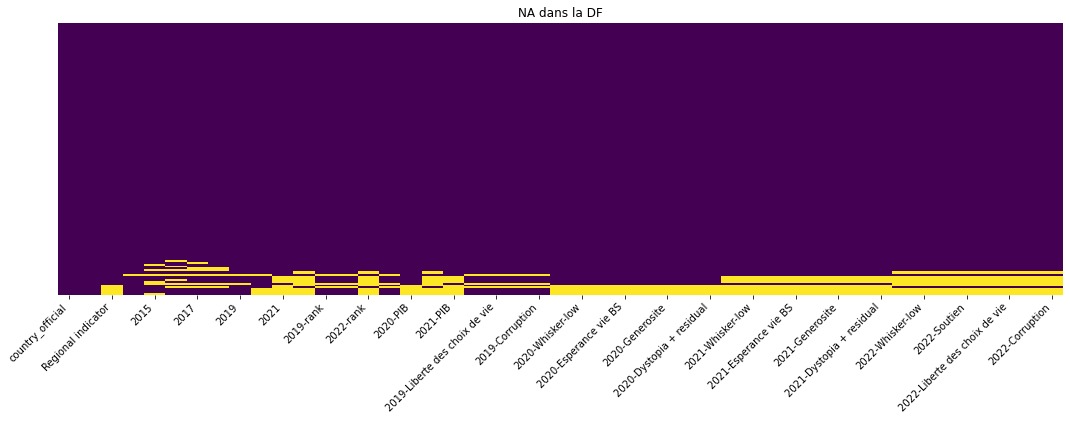

In [50]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_light_merged_clean.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

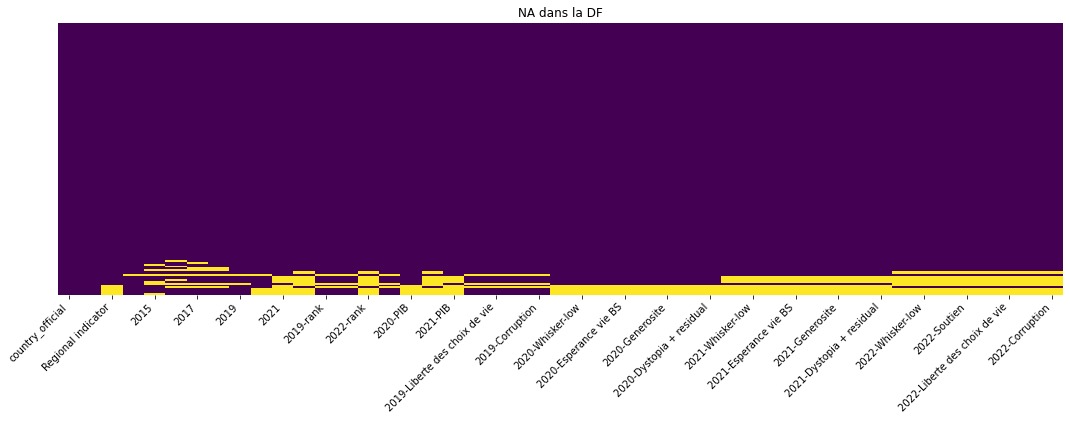

In [51]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_light_merged_clean.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [54]:
df_light_merged_clean.describe(include="all")

,country_official,country_origin,Regional indicator,country_FR,2015,2016,2017,2018,2019,2020,...,2021-Corruption,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
count,157,157,151,156,151.000000,150.000000,151.000000,152.000000,155.000000,152.000000,...,147.000000,147.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
unique,157,157,10,156,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab Republic of Egypt,Egypt,Sub-Saharan Africa,Égypte,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,39,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.381000,5.379373,5.379344,5.387618,5.405026,5.472842,...,0.731476,2.433898,5.674034,5.434317,1.837007,0.905986,0.584566,0.517186,0.147497,0.154379
std,NaN,NaN,NaN,NaN,1.152142,1.145080,1.144362,1.120735,1.116410,1.115953,...,0.175578,0.537060,1.069301,1.113188,0.533135,0.281089,0.175873,0.146364,0.083073,0.127864
min,NaN,NaN,NaN,NaN,2.839000,2.905000,2.693000,2.905000,2.853000,2.567000,...,0.082000,0.648000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,4.541500,4.406750,4.524500,4.467250,4.541000,4.712250,...,0.677500,2.143000,4.999000,4.753000,1.556000,0.732000,0.462000,0.440000,0.089000,0.068000
50%,NaN,NaN,NaN,NaN,5.253000,5.308500,5.293000,5.378000,5.373000,5.512500,...,0.787000,2.509000,5.681000,5.467000,1.895000,0.958000,0.620000,0.545000,0.134000,0.116000
75%,NaN,NaN,NaN,NaN,6.231500,6.302750,6.256000,6.177750,6.187000,6.235500,...,0.846000,2.794000,6.460000,6.202000,2.153000,1.116000,0.719000,0.627000,0.198000,0.194000


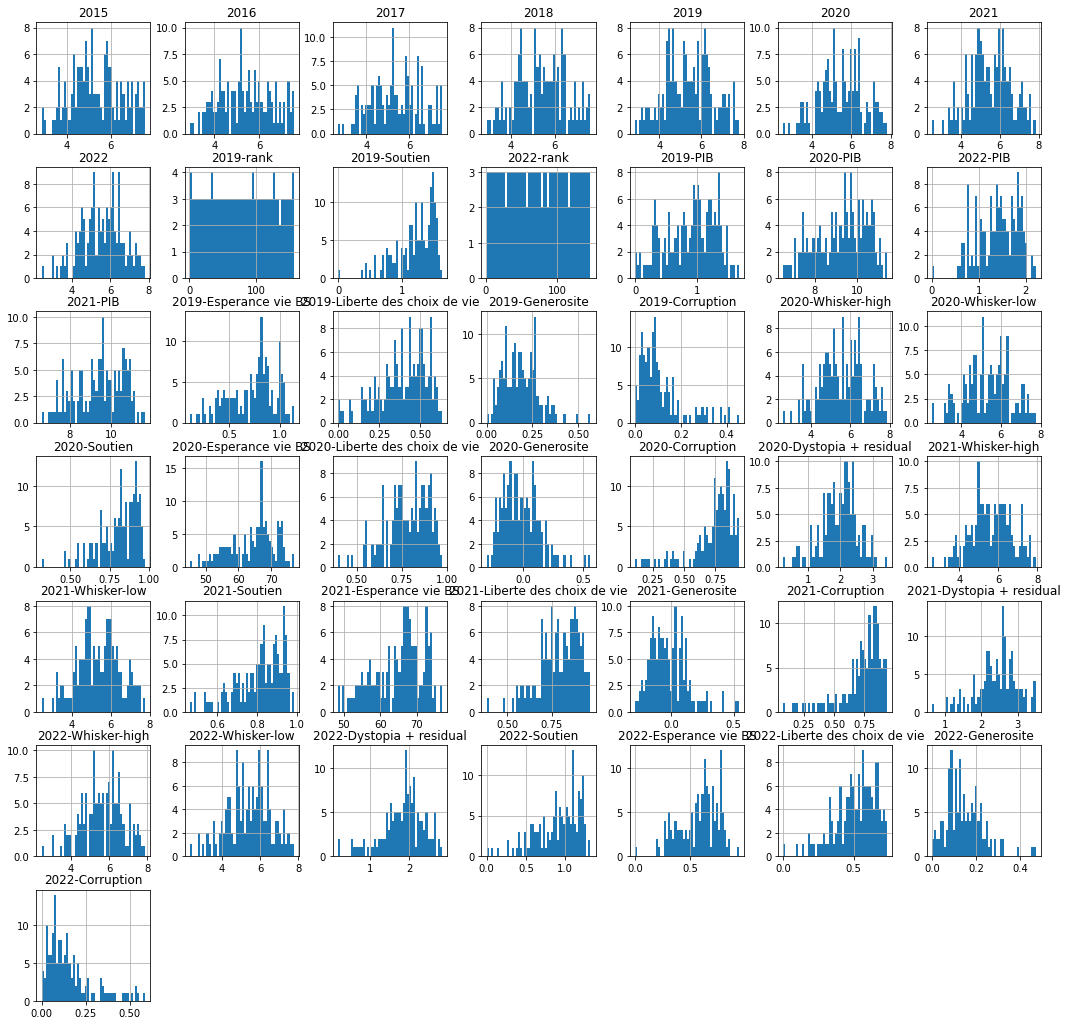

In [52]:
df_light_merged_clean.hist(figsize=(18,18),bins=50)
plt.show()

In [ ]:
to_drop_filter = (df_light_merged["_merge"] == "right_only") & (df_light_merged["2019"].isna()) & (df_light_merged["2020"].isna()) & (df_light_merged["2021"].isna()) & (df_light_merged["2022"].isna())

In [ ]:
# Suppression des lignes qui n'ont pas de données pour les dernières années
df_light_merged_clean = df_light_merged[~to_drop_filter]
print(f"{df_light_merged.shape} => {df_light_merged_clean.shape}")


(190, 50) => (184, 50)


In [71]:
df_light_merged_clean.loc[df_light_merged_clean["_merge"] != "both", ['country_official', 'country_origin', 
       'country_FR', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       '2019', 'score_2019', '2020', 'score_2020', '2021', '2022', 
       '_merge']]

,country_official,country_origin,country_FR,score_2015,score_2016,score_2017,score_2018,2019,score_2019,2020,score_2020,2021,2022,_merge
13,"Eswatini, Kingdom of",Eswatini. Kingdom of,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.396,left_only
42,Kingdom of Eswatini,NaN,Eswatini,4.867,NaN,NaN,NaN,4.212,4.212,4.308,4.308,NaN,NaN,right_only
89,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,5.536,5.536,6.223,5.467,left_only
90,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,6.159,6.159,5.536,5.467,left_only
91,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,6.159,6.159,5.536,6.221,left_only
92,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,5.536,5.536,6.223,6.221,left_only
93,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,6.159,6.159,6.223,6.221,left_only
94,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,6.159,6.159,6.223,5.467,left_only
95,Republic of Cyprus,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,5.718,5.718,5.536,5.536,5.536,5.467,left_only
96,Republic of Cyprus,Cyprus,NaN,NaN,NaN,NaN,NaN,6.046,6.046,5.536,5.536,6.223,6.221,left_only


In [76]:
y = "2019"
y2 = "score_"+y
cols = list(df_light_merged_clean.columns)
cols.remove(y)
cols.remove(y2)
cols.insert(3, y)
cols.insert(4, y2)
df_light_merged_clean.loc[(df_light_merged_clean[y] != df_light_merged_clean[y2]) & (df_light_merged_clean[y].notna()),cols]

,country_official,country_origin,Regional indicator,2019,score_2019,country_FR,score_2015,score_2016,score_2017,score_2018,...,2021-Dystopia + residual,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption,_merge
48,Kingdom of Sweden,Swaziland,Western Europe,4.212,7.343,Suède,7.364,7.291,7.284,7.314,...,2.683,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512,both
50,Kingdom of Sweden,Swaziland,Western Europe,4.212,7.343,Suède,7.364,7.291,7.284,7.314,...,2.155,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512,both
52,Kingdom of Sweden,Swaziland,Sub-Saharan Africa,4.212,7.343,Suède,7.364,7.291,7.284,7.314,...,2.155,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512,both
53,Kingdom of Sweden,Swaziland,Sub-Saharan Africa,4.212,7.343,Suède,7.364,7.291,7.284,7.314,...,2.683,7.454,7.315,2.003,1.204,0.803,0.724,0.218,0.512,both
168,State of Kuwait,Kuwait,Middle East and North Africa,6.021,6.011,Koweït,6.295,6.239,6.105,6.083,...,2.368,6.235,5.977,1.621,0.983,0.747,0.617,0.087,0.147,both


<div style="display: flex; background-color: indigo;" >

#### 2.2.2. Fusion dataset intermédiaire et données pays
</div>

In [53]:
df_light_merged_clean.columns

Index(['country_official', 'country_origin', 'Regional indicator',
       'country_FR', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       '2019', 'score_2019', '2020', 'score_2020', '2021', '2022', '2019-rank',
       '2019-Soutien', '2022-rank', '2019-PIB', '2020-PIB', '2022-PIB',
       '2021-PIB', '2019-Esperance vie BS', '2019-Liberte des choix de vie',
       '2019-Generosite', '2019-Corruption', '2020-Whisker-high',
       '2020-Whisker-low', '2020-Soutien', '2020-Esperance vie BS',
       '2020-Liberte des choix de vie', '2020-Generosite', '2020-Corruption',
       '2020-Dystopia + residual', '2021-Whisker-high', '2021-Whisker-low',
       '2021-Soutien', '2021-Esperance vie BS',
       '2021-Liberte des choix de vie', '2021-Generosite', '2021-Corruption',
       '2021-Dystopia + residual', '2022-Whisker-high', '2022-Whisker-low',
       '2022-Dystopia + residual', '2022-Soutien', '2022-Esperance vie BS',
       '2022-Liberte des choix de vie', '2022-Generosite', '2

In [52]:
print(f"ORIGIN : {df_light_merged.shape}, {df_pays_origin.shape}, AFTER ", end="")
df_global = df_light_merged.merge(df_pays_origin, on='country_official', how="left", indicator=True)
print(df_global.shape)
df_global.head()

ORIGIN : (190, 50), (213, 8), AFTER 

ValueError: Cannot use name of an existing column for indicator column

In [ ]:
df_global[df_global["_merge"]!="both"]

<div style="display: flex; background-color: green;" >

### 2.X. Chargement des autres sources de données
</div>

In [ ]:
dic_world_df = {}
for file_name in world_datas_files:
    df_temp = pd.read_csv(data_set_path+file_name, sep=',')
    print(f"{file_name}{df_temp.shape} : {df_temp.columns}")
    dic_world_df[file_name] = df_temp

print(dic_world_df.keys)

<div style="display: flex; background-color: Blue; padding: 15px;" >

# 3.Exploration des données
</div>

In [ ]:
the_df = df_light_merged_clean.copy()
the_df_by_line = df_light_completed_by_line.copy()

<div style="display: flex; background-color: green;" >

## 1.1. Visualisation des données
</div>


In [ ]:
print(the_df.shape)
print(the_df_by_line.shape)


In [ ]:
the_df.head()

In [ ]:
the_df_by_line.head()

In [ ]:
the_df.dtypes

In [ ]:
the_df_by_line.dtypes

In [ ]:
the_df.describe(include="all")

In [ ]:
the_df_by_line.describe(include="all")

In [ ]:
the_df.hist(figsize=(25,25),bins=50)

In [ ]:
the_df_by_line.hist(figsize=(25,25),bins=50)

<div style="display: flex; background-color: green;" >

## 1.2. Analyse des NaN
</div>


In [ ]:
sns.heatmap(the_df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
msno.heatmap(the_df)

In [ ]:
# Avant nettoyage
msno.matrix(the_df)

In [ ]:
msno.bar(the_df)

<div style="display: flex; background-color: green;" >

## 1.2. Corrélations entre les données
</div>


In [ ]:
df_origine["score_int"] = round(df_origine["Score"])
df_origine["score_int"] = df_origine["score_int"].astype('int')

In [ ]:
sns.pairplot(df_origine, hue="score_int")

In [ ]:
draw_correlation_graphe(df_origine, "Corrélation entre les variables", verbose=verbose,fontsize=12)

<div style="display: flex; background-color: green;" >

## 1.3. Visualisation des outliers
</div>


In [ ]:
cols = get_numeric_columns_names(df_origine)
for column_name in cols:
    q_low, q_hi,iqr, q_min, q_max = get_outliers_datas(df_origine, column_name)
    graphe_outliers(df_origine, column_name, q_min, q_max)

<div style="display: flex; background-color: green;" >

## 1.4. Analyse des autres doublons possible
</div>


# Chargement DF pays

In [ ]:
pays_file_name = "data_set_countries_clean.csv"

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Annexes
</div>

In [ ]:
just to fail

<div style="display: flex; background-color: Green; padding: 7px;" >

### Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Nettoyage des pays par année dans la DF 
</div>

In [ ]:
diff = df_origine_light[df_origine_light["2019-country_origin"] != df_origine_light["2019-country"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin','2019-country',
       '2020-country_origin', '2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2019-country"].notna()].shape)
diff[diff["2019-country"].notna()]

(6, 10)


,country_official,Regional indicator,2019-country_origin,2019-country,2020-country_origin,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,Congo (Kinshasa),Democratic Republic of the Congo,NaN,NaN,NaN,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Swaziland,Eswatini,Swaziland,Eswatini,Eswatini. Kingdom of,Eswatini
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,NaN,NaN,NaN,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,South Sudan,Sudan,NaN,NaN,NaN,NaN


In [ ]:
diff = df_origine_light[df_origine_light["2019-country_origin"] != df_origine_light["2020-country_origin"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin',
       '2020-country_origin', '2019-country','2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2019-country_origin"].notna() & diff["2020-country_origin"].notna()].shape)
diff[diff["2019-country_origin"].notna() & diff["2020-country_origin"].notna()]

(4, 10)


,country_official,Regional indicator,2019-country_origin,2020-country_origin,2019-country,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,Macedonia,North Macedonia,Macedonia,North Macedonia,North Macedonia,North Macedonia,North Macedonia
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,NaN,NaN,NaN,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,North Cyprus,Northern Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus


In [ ]:
diff = df_origine_light[df_origine_light["2020-country_origin"] != df_origine_light["2021-country_origin"]]
diff = diff[['country_official', 'Regional indicator', 
       '2020-country_origin', '2021-country_origin', '2020-country', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2020-country_origin"].notna() & diff["2021-country_origin"].notna()].shape)
diff[diff["2020-country_origin"].notna() & diff["2021-country_origin"].notna()]

(1, 8)


,country_official,Regional indicator,2020-country_origin,2021-country_origin,2020-country,2021-country,2022-country_origin,2022-country
107,Republic of North Macedonia,Central and Eastern Europe,Macedonia,North Macedonia,Macedonia,North Macedonia,North Macedonia,North Macedonia


In [ ]:
diff = df_origine_light[df_origine_light["2021-country_origin"] != df_origine_light["2022-country_origin"]]
diff = diff[['country_official', 'Regional indicator', 
       '2021-country_origin', '2022-country_origin', '2021-country', '2022-country' ]]
print(diff[diff["2021-country_origin"].notna() & diff["2022-country_origin"].notna()].shape)
diff[diff["2021-country_origin"].notna() & diff["2022-country_origin"].notna()]

(3, 6)


,country_official,Regional indicator,2021-country_origin,2022-country_origin,2021-country,2022-country
7,Czech Republic,Central and Eastern Europe,Czech Republic,Czechia,Czech Republic,Czech Republic
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini. Kingdom of,Eswatini,Eswatini
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Congo,Republic of the Congo,Congo


In [ ]:
diff = df_origine_light[df_origine_light["2020-country_origin"] != df_origine_light["2020-country"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin','2019-country',
       '2020-country_origin', '2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2020-country"].notna()].shape)
diff[diff["2020-country"].notna()]

(6, 10)


,country_official,Regional indicator,2019-country_origin,2019-country,2020-country_origin,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,Congo (Kinshasa),Democratic Republic of the Congo,NaN,NaN,NaN,NaN
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Swaziland,Eswatini,Swaziland,Eswatini,Eswatini. Kingdom of,Eswatini
156,Republic of China,East Asia,NaN,NaN,Taiwan Province of China,Republic of China,Taiwan Province of China,Republic of China,Taiwan Province of China,Republic of China
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,South Sudan,Sudan,NaN,NaN,NaN,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus


In [ ]:
diff = df_origine_light_completed2[df_origine_light_completed2["2020-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2020-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2020-country_origin
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,North Macedonia,Macedonia
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,Northern Cyprus,North Cyprus


In [ ]:
try:
    df_origine_light_completed2 = df_origine_light_completed2.drop("2020-country_origin", axis=1)
except:
    pass
diff = df_origine_light_completed2[df_origine_light_completed2["2021-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2021-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2021-country_origin
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
try:
    df_origine_light_completed2 = df_origine_light_completed2.drop("2021-country_origin", axis=1)
except:
    pass
diff = df_origine_light_completed2[df_origine_light_completed2["2022-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2022-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2022-country_origin
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
7,Czech Republic,Central and Eastern Europe,Czech Republic,Czech Republic,Czechia
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Eswatini. Kingdom of
72,Republic of Burundi,Sub-Saharan Africa,Burundi,Burundi,NaN
87,Republic of Haiti,Latin America and Caribbean,Haiti,Haiti,NaN
157,Republic of Maldives,South Asia,Maldives,Maldives,NaN


In [ ]:
col = "2020-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2020-country
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,North Macedonia,Macedonia
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
col = "2021-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2021-country
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
col = "2022-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2022-country
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
72,Republic of Burundi,Sub-Saharan Africa,Burundi,Burundi,NaN
87,Republic of Haiti,Latin America and Caribbean,Haiti,Haiti,NaN
157,Republic of Maldives,South Asia,Maldives,Maldives,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN


In [ ]:
df_origine_light_completed2[df_origine_light_completed2["country_origin"]!=df_origine_light_completed2["country"]]

,country_official,Regional indicator,country_origin,country,2019-rank,2022,2021,2020,2019,2019-PIB,...,2022-rank,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,127.0,NaN,NaN,4.311,4.418,0.094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,76.0,5.425,5.477,5.510,5.430,1.438,...,81.0,5.501,5.348,0.642,1.957,0.954,0.942,0.400,0.147,0.383
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,135.0,4.396,4.308,4.308,4.212,0.811,...,125.0,4.607,4.185,1.688,1.274,0.786,0.197,0.259,0.038,0.154
156,Republic of China,East Asia,Taiwan Province of China,Republic of China,NaN,6.512,6.584,6.455,NaN,NaN,...,26.0,6.596,6.429,2.002,1.897,1.095,0.733,0.542,0.075,0.168
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,39.0,NaN,NaN,6.192,6.192,1.231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,103.0,5.075,5.342,5.194,4.812,0.673,...,99.0,5.235,4.915,2.658,0.950,0.405,0.355,0.431,0.130,0.146
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,156.0,NaN,NaN,2.817,2.853,0.306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="display: flex; background-color: Green; padding: 7px;" >

### Nettoyage des données suite fusion avec les fichiers d'évolution des scores par année
</div>

In [ ]:
col1 = '2019'
col2 = 'score_'+col1

diff = df_light_merged[(df_light_merged[col1] != df_light_merged[col2]) & (df_light_merged[col2].notna()) & (df_light_merged[col1].notna())]
print(diff.shape)
diff[['country_official', 'country_origin', 'Regional indicator',
       'country_FR', col1, col2,'_merge']]

(3, 50)


,country_official,country_origin,Regional indicator,country_FR,2019,score_2019,_merge
131,Republic of the Congo,Congo (Brazzaville),Sub-Saharan Africa,Congo (RDC),4.812,4.418,both
140,Slovak Republic,Slovakia,Central and Eastern Europe,Slovénie,6.198,6.118,both
143,State of Kuwait,Kuwait,Middle East and North Africa,Koweït,6.021,6.011,both


In [ ]:
col1 = '2020'
col2 = 'score_'+col1

diff = df_light_merged[(df_light_merged[col1] != df_light_merged[col2]) & (df_light_merged[col2].notna()) & (df_light_merged[col1].notna())]
print(diff.shape)
diff[['country_official', 'country_origin', 'Regional indicator',
       'country_FR', col1, col2,'_merge']]

(2, 50)


,country_official,country_origin,Regional indicator,country_FR,2020,score_2020,_merge
131,Republic of the Congo,Congo (Brazzaville),Sub-Saharan Africa,Congo (RDC),5.194,4.311,both
140,Slovak Republic,Slovakia,Central and Eastern Europe,Slovénie,6.281,6.363,both
